<a href="https://colab.research.google.com/github/samrudhi93/Implementing-LSTM-using-word2vec/blob/main/Text_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from digital sreeni youtube

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
import random
import sys

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget /content/drive/MyDrive/Colab Notebooks/the_jungle_book.txt

/content/drive/MyDrive/Colab: Scheme missing.
--2021-06-18 15:35:22--  http://notebooks/the_jungle_book.txt
Resolving notebooks (notebooks)... failed: Name or service not known.
wget: unable to resolve host address ‘notebooks’


In [74]:
filename = '/content/drive/MyDrive/Colab Notebooks/the_jungle_book.txt'

In [75]:
txt_file = open(filename, 'r')

In [76]:
FileContent = txt_file.read()

In [77]:
FileContent

'The Project Gutenberg EBook of The Jungle Book, by Rudyard Kipling\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: The Jungle Book\n\nAuthor: Rudyard Kipling\n\nRelease Date: January 16, 2006 [EBook #236]\nLast Updated: October 6, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE JUNGLE BOOK ***\n\n\n\n\nProduced by An Anonymous Volunteer and David Widger\n\n\n\n\n\nTHE JUNGLE BOOK\n\nBy Rudyard Kipling\n\n\n\nContents\n\n     Mowgli’s Brothers\n     Hunting-Song of the Seeonee Pack\n     Kaa’s Hunting\n     Road-Song of the Bandar-Log\n     “Tiger! Tiger!”\n      Mowgli’s Song\n     The White Seal\n     Lukannon\n     “Rikki-Tikki-Tavi”\n      Darzee’s Chant\n     Toomai of the Elephants\n     Shiv and the Grass

In [78]:
raw_text = FileContent.lower()

In [79]:
print(raw_text[0:1000])

the project gutenberg ebook of the jungle book, by rudyard kipling

this ebook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  you may copy it, give it away or
re-use it under the terms of the project gutenberg license included
with this ebook or online at www.gutenberg.org


title: the jungle book

author: rudyard kipling

release date: january 16, 2006 [ebook #236]
last updated: october 6, 2016

language: english

character set encoding: utf-8

*** start of this project gutenberg ebook the jungle book ***




produced by an anonymous volunteer and david widger





the jungle book

by rudyard kipling



contents

     mowgli’s brothers
     hunting-song of the seeonee pack
     kaa’s hunting
     road-song of the bandar-log
     “tiger! tiger!”
      mowgli’s song
     the white seal
     lukannon
     “rikki-tikki-tavi”
      darzee’s chant
     toomai of the elephants
     shiv and the grasshopper
     her majesty’s servants
     parade son

In [80]:
#CLEAN TEXT
#Remove numbers
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [81]:
raw_text[0:700]

'the project gutenberg ebook of the jungle book, by rudyard kipling\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.org\n\n\ntitle: the jungle book\n\nauthor: rudyard kipling\n\nrelease date: january ,  [ebook #]\nlast updated: october , \n\nlanguage: english\n\ncharacter set encoding: utf-\n\n*** start of this project gutenberg ebook the jungle book ***\n\n\n\n\nproduced by an anonymous volunteer and david widger\n\n\n\n\n\nthe jungle book\n\nby rudyard kipling\n\n\n\ncontents\n\n     mowgli’s brothers\n     hunting-song of the se'

In [82]:
print(set(raw_text))

{' ', '#', 'n', 'j', 'g', '?', 'm', 'h', ',', '-', 'o', '*', '(', 'e', 'z', 'b', '’', '$', 'l', 'f', ':', '”', 'q', 'c', '\n', 'p', 'i', '%', '!', '“', 'x', 's', 'u', '‘', 'w', 'a', '[', 't', ']', 'd', 'v', 'y', '`', ')', 'r', '.', '@', 'k', '/', ';'}


In [83]:
print(list(set(raw_text)))

[' ', '#', 'n', 'j', 'g', '?', 'm', 'h', ',', '-', 'o', '*', '(', 'e', 'z', 'b', '’', '$', 'l', 'f', ':', '”', 'q', 'c', '\n', 'p', 'i', '%', '!', '“', 'x', 's', 'u', '‘', 'w', 'a', '[', 't', ']', 'd', 'v', 'y', '`', ')', 'r', '.', '@', 'k', '/', ';']


In [84]:
print(sorted(list(set(raw_text))))

['\n', ' ', '!', '#', '$', '%', '(', ')', '*', ',', '-', '.', '/', ':', ';', '?', '@', '[', ']', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']


In [85]:
#How many total characters do we have in our training text?
chars = sorted(list(set(raw_text))) #List of every character

In [86]:
chars

['\n',
 ' ',
 '!',
 '#',
 '$',
 '%',
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '?',
 '@',
 '[',
 ']',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '‘',
 '’',
 '“',
 '”']

In [87]:
#Character sequences must be encoded as integers. 
#Each unique character will be assigned an integer value. 
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [88]:
char_to_int

{'\n': 0,
 ' ': 1,
 '!': 2,
 '#': 3,
 '$': 4,
 '%': 5,
 '(': 6,
 ')': 7,
 '*': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 ':': 13,
 ';': 14,
 '?': 15,
 '@': 16,
 '[': 17,
 ']': 18,
 '`': 19,
 'a': 20,
 'b': 21,
 'c': 22,
 'd': 23,
 'e': 24,
 'f': 25,
 'g': 26,
 'h': 27,
 'i': 28,
 'j': 29,
 'k': 30,
 'l': 31,
 'm': 32,
 'n': 33,
 'o': 34,
 'p': 35,
 'q': 36,
 'r': 37,
 's': 38,
 't': 39,
 'u': 40,
 'v': 41,
 'w': 42,
 'x': 43,
 'y': 44,
 'z': 45,
 '‘': 46,
 '’': 47,
 '“': 48,
 '”': 49}

In [89]:
#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))
int_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '#',
 4: '$',
 5: '%',
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '/',
 13: ':',
 14: ';',
 15: '?',
 16: '@',
 17: '[',
 18: ']',
 19: '`',
 20: 'a',
 21: 'b',
 22: 'c',
 23: 'd',
 24: 'e',
 25: 'f',
 26: 'g',
 27: 'h',
 28: 'i',
 29: 'j',
 30: 'k',
 31: 'l',
 32: 'm',
 33: 'n',
 34: 'o',
 35: 'p',
 36: 'q',
 37: 'r',
 38: 's',
 39: 't',
 40: 'u',
 41: 'v',
 42: 'w',
 43: 'x',
 44: 'y',
 45: 'z',
 46: '‘',
 47: '’',
 48: '“',
 49: '”'}

In [90]:
n_chars = len(raw_text)

n_chars

292869

In [91]:

n_vocab = len(chars)
n_vocab

50

In [ ]:
########################
#Now that we have characters we can create input/output sequences for training
#Remember that for LSTM input and output can be sequences... hence the term seq2seq

In [92]:
seq_length = 60 #length of each input sequence, it takes 60 input and predict the 61th
step = 10   #Instead of moving 1 letter at a time, try skipping a few. means it predicts after 10 letters
sentences = []    # X values (Sentences)
next_chars = []   # Y values. The character that follows the sentence defined as X

In [93]:
for i in range(0, n_chars-seq_length, step):
    print("Sentences",sentences.append(raw_text[i:i+seq_length])) #from  0 to 60 one by one as input sequence till n_chars
    print("Next Character", next_chars.append(raw_text[i+seq_length]))
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)
    

Streaming output truncated to the last 5000 lines.
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next Character None
Sentences None
Next

In [94]:
sentences

['the project gutenberg ebook of the jungle book, by rudyard k',
 't gutenberg ebook of the jungle book, by rudyard kipling\n\nth',
 'g ebook of the jungle book, by rudyard kipling\n\nthis ebook i',
 ' the jungle book, by rudyard kipling\n\nthis ebook is for the ',
 'e book, by rudyard kipling\n\nthis ebook is for the use of any',
 ' rudyard kipling\n\nthis ebook is for the use of anyone anywhe',
 'ipling\n\nthis ebook is for the use of anyone anywhere at no c',
 'is ebook is for the use of anyone anywhere at no cost and wi',
 's for the use of anyone anywhere at no cost and with\nalmost ',
 'use of anyone anywhere at no cost and with\nalmost no restric',
 'one anywhere at no cost and with\nalmost no restrictions what',
 're at no cost and with\nalmost no restrictions whatsoever.  y',
 'ost and with\nalmost no restrictions whatsoever.  you may cop',
 'th\nalmost no restrictions whatsoever.  you may copy it, give',
 'no restrictions whatsoever.  you may copy it, give it away o',
 'tions

In [95]:
next_chars

['i',
 'i',
 's',
 'u',
 'o',
 'r',
 'o',
 't',
 'n',
 't',
 's',
 'o',
 'y',
 ' ',
 'r',
 't',
 'e',
 ' ',
 'c',
 'r',
 ' ',
 'w',
 'e',
 'n',
 'w',
 'r',
 'i',
 'j',
 'k',
 ' ',
 'i',
 'l',
 ':',
 ',',
 '#',
 'd',
 'o',
 'a',
 'n',
 'a',
 't',
 ':',
 '*',
 ' ',
 'e',
 'e',
 't',
 ' ',
 '\n',
 'e',
 'n',
 'o',
 'n',
 'i',
 '\n',
 'e',
 ' ',
 'i',
 'c',
 ' ',
 'i',
 'r',
 'n',
 ' ',
 'e',
 '\n',
 's',
 ' ',
 's',
 'e',
 'o',
 'i',
 'r',
 'm',
 'o',
 'h',
 'e',
 'u',
 ' ',
 't',
 '”',
 'r',
 'n',
 'o',
 'e',
 's',
 'v',
 'g',
 'r',
 ' ',
 ' ',
 ' ',
 'e',
 't',
 'n',
 '\n',
 'b',
 ' ',
 'a',
 't',
 'h',
 'i',
 ' ',
 'n',
 ' ',
 '-',
 'e',
 'e',
 'b',
 'u',
 ' ',
 'd',
 'n',
 ' ',
 'i',
 'r',
 ' ',
 ',',
 't',
 't',
 'l',
 'o',
 'h',
 'g',
 'n',
 ' ',
 'k',
 'u',
 '\n',
 't',
 't',
 '\n',
 'e',
 'c',
 'r',
 'e',
 'h',
 ' ',
 'n',
 'o',
 'p',
 ' ',
 't',
 'e',
 ',',
 'a',
 ' ',
 'a',
 't',
 'h',
 ' ',
 'e',
 'e',
 't',
 '.',
 'o',
 't',
 ' ',
 ' ',
 'c',
 'f',
 'i',
 'l',
 ' ',
 'o',
 'i'

In [ ]:
#Just like time series, X is the sequence / sentence and y is the next value
#that comes after the sentence... 

# reshape input to be [samples, time steps, features]

#time steps = sequence length
#features = numbers of characters in our vocab (n_vocab)
#Vectorize all sentences: there are n_patterns sentences.
#For each sentence we have n_vocab characters available for seq_length
#Vectorization returns a vector for all sentences indicating the presence or absence 
#of a character. 


In [96]:
#first taking array as filled with '0's and then iterate over sentences and then characters and if that char is present 
#in the char of that sentences then put it as '1' - True
# this way filling the x and y with the encoded characters into integers 
x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])


(29281, 60, 50)
(29281, 50)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False  True False False False False False False False False False
  False False]
 [False False False False False False F

In [ ]:
nop = np.zeros((len(sentences), seq_length, n_vocab))

In [ ]:
nop.size

In [ ]:
nop

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [97]:
#Basic model with one LSTM
# build the model: a single LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab))) #(60, 50) 50 is vector 
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                6450      
Total params: 98,098
Trainable params: 98,098
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
######################################
# Deeper model woth 2 LSTM
#To stack LSTM layers, we need to change the configuration of the prior 
#LSTM layer to output a 3D array as input for the subsequent layer.
#We can do this by setting the return_sequences argument on the layer to True 
#(defaults to False). This will return one output for each input time step and provide a 3D array.
#Below is the same example as above with return_sequences=True.

#model = Sequential()
#model.add(LSTM(128, input_shape=(seq_length, n_vocab), return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(128))
#model.add(Dropout(0.2))
#model.add(Dense(n_vocab, activation='softmax'))

#optimizer = RMSprop(lr=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)
#model.summary()

In [ ]:
next_chars

In [98]:
# define the checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]



In [99]:
# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

model.save('my_saved_weights_jungle_book_50epochs.h5')

Epoch 1/50
229/229 [==============================] - 3s 7ms/step - loss: 2.5033

Epoch 00001: loss improved from inf to 2.50331, saving model to saved_weights/saved_weights-01-2.5033.hdf5
Epoch 2/50
229/229 [==============================] - 2s 7ms/step - loss: 2.0399

Epoch 00002: loss improved from 2.50331 to 2.03987, saving model to saved_weights/saved_weights-02-2.0399.hdf5
Epoch 3/50
229/229 [==============================] - 2s 7ms/step - loss: 1.8470

Epoch 00003: loss improved from 2.03987 to 1.84701, saving model to saved_weights/saved_weights-03-1.8470.hdf5
Epoch 4/50
229/229 [==============================] - 2s 7ms/step - loss: 1.7028

Epoch 00004: loss improved from 1.84701 to 1.70281, saving model to saved_weights/saved_weights-04-1.7028.hdf5
Epoch 5/50
229/229 [==============================] - 2s 7ms/step - loss: 1.5860

Epoch 00005: loss improved from 1.70281 to 1.58596, saving model to saved_weights/saved_weights-05-1.5860.hdf5
Epoch 6/50
229/229 [===================

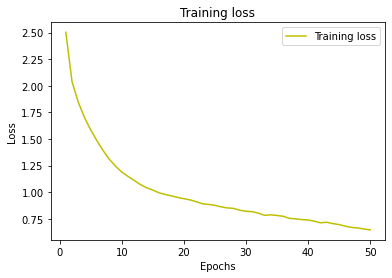

In [100]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [101]:
#Generate characters 
#We must provide a sequence of seq_lenth as input to start the generation process

#The prediction results is probabilities for each of the 48 characters at a specific
#point in sequence. Let us pick the one with max probability and print it out.
#Writing our own softmax function....

def sample(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds) #exp of log (x), isn't this same as x??
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)



In [102]:
#Prediction
# load the network weights
filename = "my_saved_weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')
#sys.stdout.write(generated)



----- Seed for our text prediction: "lrus islet, and he tumbled
backward in the water, for he kne"


In [104]:
for i in range(1000):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = sample(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()


 wood sood the works. it is a stwaken bagheers and been hunting aprody him
his
houts and
sid we got the cammersing o works took
as eniter grown--hundrive fegt. elephar wored. but, and kice the darl,” he it him over.”

“als have see one twime the feet
wimer out.

hear his hoars. never come thou soated undergr--a wolv call-te seas look im,” said 
him bogen you grow that
man, and lease onorget. me, haugse, and so had roofail roofers say befere.”

o hond thon monke sorth, and should roof-hurserd the world’rls, should plai come of rellits. me people. the foot the barances and i see. thouskitala
went on, and the sea of this of a
all
waylied borg tull the reachept thin bag.”

“rike foug to
danches, day a full, thought the by stonck play old, before train,
        woody, and i
weftly baghans plan banks or feet wack
him some little. than some
thought of a chall, when he call
walt doncmes and aurs at lefs, fluld he
people. the ran and
urgain!”

“it is very sill.
but he had stone the elephants we